Question: When are p-values right skewed?

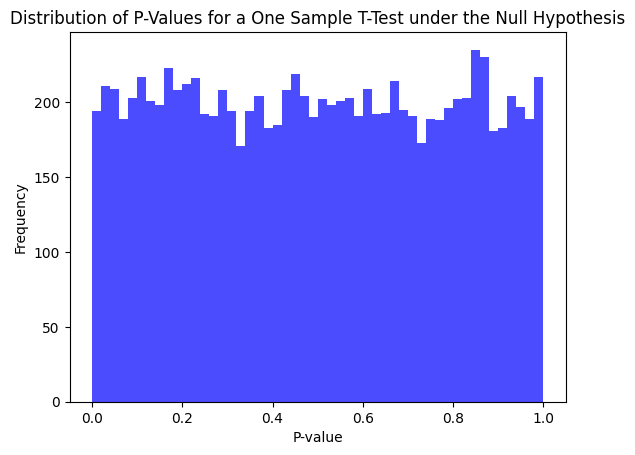

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
num_samples = 10000
sample_size = 30
population_mean = 0  # under the null hypothesis

# Simulate data and collect p-values
p_values = []
for _ in range(num_samples):
    sample = np.random.normal(population_mean, 1, sample_size)
    t_stat, p_value = stats.ttest_1samp(sample, population_mean)
    p_values.append(p_value)

# Plot the distribution of p-values
plt.hist(p_values, bins=50, color='blue', alpha=0.7)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a One Sample T-Test under the Null Hypothesis')
plt.show()


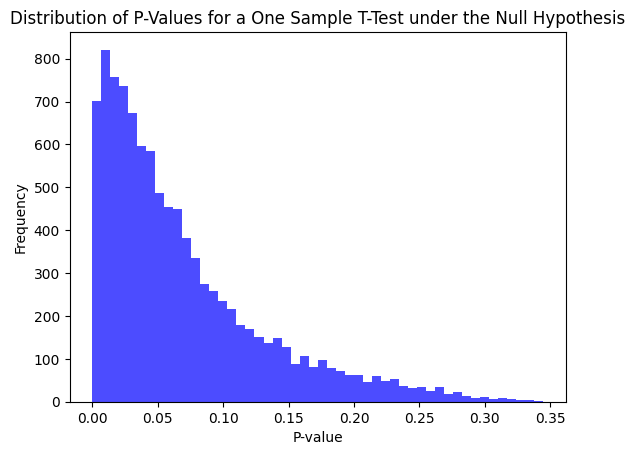

In [3]:
# Simulate data and collect p-values
p_values = []
for _ in range(num_samples):
    sample = np.random.lognormal(0, 1, 5)
    t_stat, p_value = stats.ttest_1samp(sample, 0)
    p_values.append(p_value)

# Plot the distribution of p-values
plt.hist(p_values, bins=50, color='blue', alpha=0.7)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a One Sample T-Test under the Null Hypothesis')
plt.show()

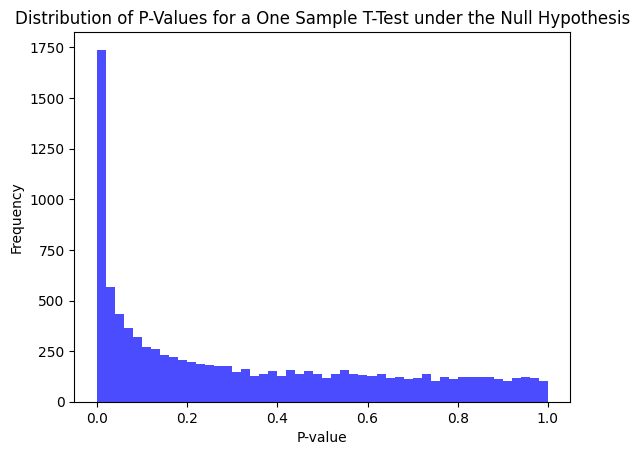

In [4]:
# Simulate data and collect p-values
p_values = []
for _ in range(num_samples):
    # Parameters for the AR(1) process
    phi = 0.5  # Autoregression coefficient
    noise_std = 1  # Standard deviation of the noise
    num_points = 30  # Number of points in the time series

    # Initialize the time series array
    time_series = np.zeros(num_points)
    time_series[0] = np.random.normal(0, noise_std)  # First value of the series

    # Generate the time series
    for i in range(1, num_points):
        time_series[i] = phi * time_series[i - 1] + np.random.normal(0, noise_std)

    t_stat, p_value = stats.ttest_1samp(time_series, 0)
    p_values.append(p_value)

# Plot the distribution of p-values
plt.hist(p_values, bins=50, color='blue', alpha=0.7)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a One Sample T-Test under the Null Hypothesis')
plt.show()

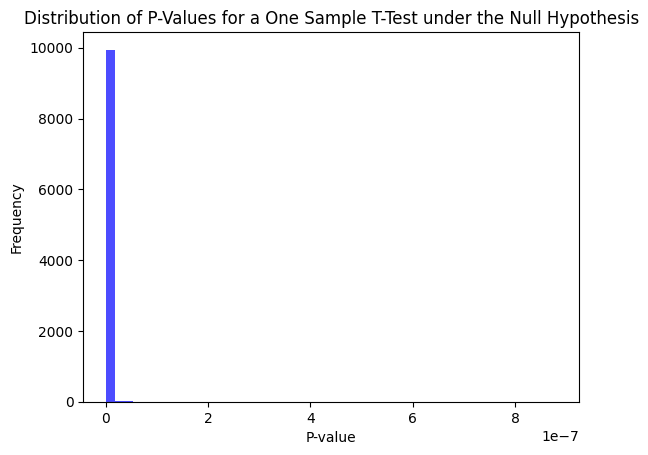

In [5]:
# Simulate data and collect p-values
p_values = []
for _ in range(num_samples):
    sample = np.random.beta(5, 1, sample_size) - 0.5
    t_stat, p_value = stats.ttest_1samp(sample, 0)
    p_values.append(p_value)

# Plot the distribution of p-values
plt.hist(p_values, bins=50, color='blue', alpha=0.7)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a One Sample T-Test under the Null Hypothesis')
plt.show()

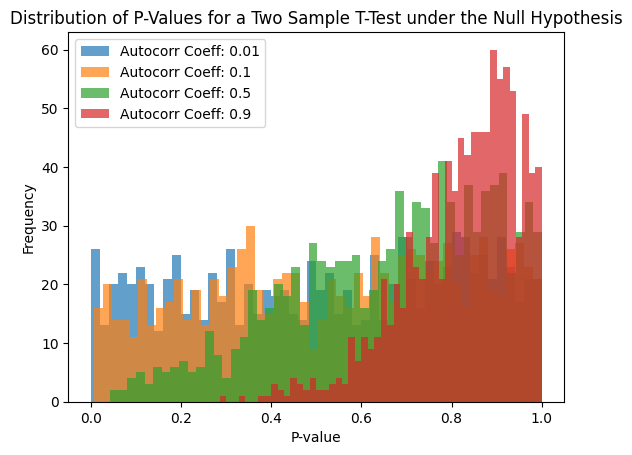

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def generate_autocorrelated_data(n, autocorr_coefficient):
    """
    Generate a series of autocorrelated data points.

    Parameters:
    n (int): Number of data points to generate.
    autocorr_coefficient (float): The autocorrelation coefficient, between 0 and 1.

    Returns:
    np.ndarray: An array of autocorrelated data points.
    """
    # Start with a random initial value
    data = [np.random.randn()]

    # Generate each new data point
    for _ in range(1, n):
        new_value = autocorr_coefficient * data[-1] + (1 - autocorr_coefficient) * np.random.randn()
        data.append(new_value)

    return np.array(data)

# Example usage
n = 100 # Number of data points
num_samples = 1000
autocorr_coefficients = [0.01, 0.1, 0.5, 0.9] # Different autocorrelation coefficients

# Simulate data and collect p-values for each autocorrelation coefficient
for autocorr_coefficient in autocorr_coefficients:
    p_values = []
    for _ in range(num_samples):
        autocorrelated_data = generate_autocorrelated_data(n, autocorr_coefficient)
        t_statistic, p_value = stats.ttest_ind(autocorrelated_data[::2], autocorrelated_data[1::2])
        p_values.append(p_value)

    # Plot the distribution of p-values
    plt.hist(p_values, bins=50, alpha=0.7, label=f'Autocorr Coeff: {autocorr_coefficient}')

plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a Two Sample T-Test under the Null Hypothesis')
plt.legend()
plt.show()

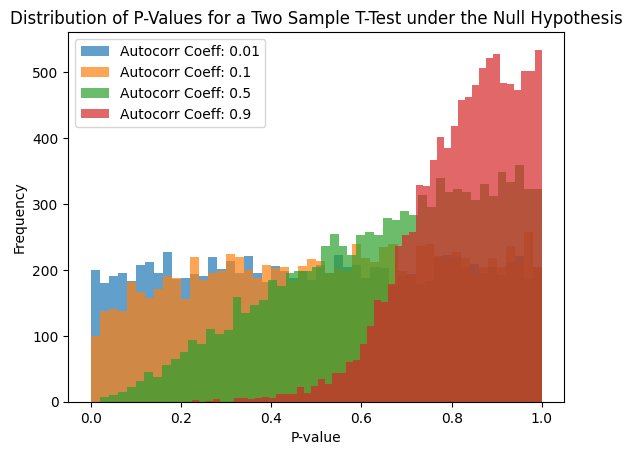

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def generate_autocorrelated_data(n, autocorr_coefficient):
    """
    Generate a series of autocorrelated data points.

    Parameters:
    n (int): Number of data points to generate.
    autocorr_coefficient (float): The autocorrelation coefficient, between 0 and 1.

    Returns:
    np.ndarray: An array of autocorrelated data points.
    """
    # Start with a random initial value
    data = [np.random.randn()]

    # Generate each new data point
    for _ in range(1, n):
        new_value = autocorr_coefficient * data[-1] + (1 - autocorr_coefficient) * np.random.randn()
        data.append(new_value)

    return np.array(data)

# Example usage
n = 100 # Number of data points
num_samples = 10000
autocorr_coefficients = [0.01, 0.1, 0.5, 0.9] # Different autocorrelation coefficients

# Simulate data and collect p-values for each autocorrelation coefficient
for autocorr_coefficient in autocorr_coefficients:
    p_values = []
    for _ in range(num_samples):
        autocorrelated_data = generate_autocorrelated_data(n, autocorr_coefficient)
        t_statistic, p_value = stats.ttest_ind(autocorrelated_data[::2], autocorrelated_data[1::2])
        p_values.append(p_value)

    # Plot the distribution of p-values
    plt.hist(p_values, bins=50, alpha=0.7, label=f'Autocorr Coeff: {autocorr_coefficient}')

plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a Two Sample T-Test under the Null Hypothesis')
plt.legend()
plt.show()